In [1]:
"C:\\Users\hp\Downloads\archive\Participants_Data_HPP\Train.csv"

'C:\\Users\\hp\\Downloads\x07rchive\\Participants_Data_HPP\\Train.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer


In [3]:
file_path="C:\\Users\\hp\\Downloads\\archive\\Participants_Data_HPP\\Train.csv"
data=pd.read_csv(file_path)

# define the futures and target variable

In [4]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


# define independent feautures and dependable features

In [5]:
x=data.drop('TARGET(PRICE_IN_LACS)',axis=1)

In [6]:
y=data['TARGET(PRICE_IN_LACS)']

In [7]:
type(x)

pandas.core.frame.DataFrame

In [8]:
type(y)

pandas.core.series.Series

# identify data types

In [9]:
data.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

# Check if data is imbalance or not

In [10]:
class_distribution=data['TARGET(PRICE_IN_LACS)'].value_counts()
print(class_distribution)

TARGET(PRICE_IN_LACS)
110.0      795
100.0      770
120.0      652
130.0      598
45.0       583
          ... 
86.1         1
1550.0       1
28000.0      1
9910.0       1
18.3         1
Name: count, Length: 1172, dtype: int64


# using groupby(),size()

In [11]:
target_distribution=data.groupby('TARGET(PRICE_IN_LACS)').size()

In [12]:
target_distribution

TARGET(PRICE_IN_LACS)
0.25        1
0.29        1
0.48        1
0.85        1
1.00        1
           ..
9910.00     1
9990.00     1
25000.00    1
28000.00    1
30000.00    1
Length: 1172, dtype: int64

In [13]:
# using matplot lib

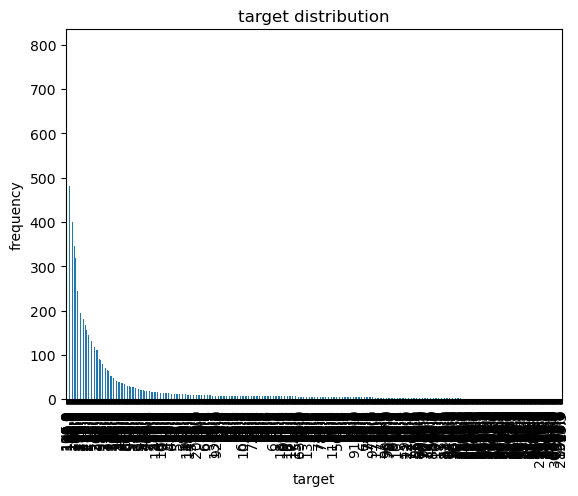

In [14]:
import matplotlib.pyplot as plt
class_distribution.plot(kind='bar')
plt.title('target distribution')
plt.xlabel('target')
plt.ylabel('frequency')
plt.show()

In [15]:
# using seaborn

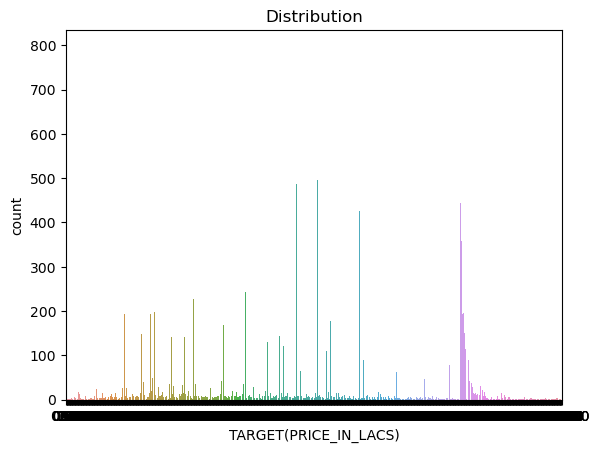

In [16]:
import seaborn as sns
sns.countplot(x='TARGET(PRICE_IN_LACS)',data=data)
plt.title('Distribution')
plt.show()

In [17]:
# using sklearn

In [18]:
from sklearn.utils import class_weight
import numpy as np
class_weights=class_weight.compute_class_weight('balanced',classes=np.unique(data['TARGET(PRICE_IN_LACS)']),y=data['TARGET(PRICE_IN_LACS)'])
print(class_weights)

[25.12883959 25.12883959 25.12883959 ... 25.12883959 25.12883959
 25.12883959]


In [19]:
# using collections.counter

In [20]:
from collections import Counter
class_distribution=Counter(data['TARGET(PRICE_IN_LACS)'])
class_distribution

Counter({110.0: 795,
         100.0: 770,
         120.0: 652,
         130.0: 598,
         45.0: 583,
         35.0: 533,
         65.0: 496,
         60.0: 486,
         55.0: 482,
         40.0: 472,
         50.0: 447,
         150.0: 443,
         140.0: 440,
         75.0: 426,
         160.0: 411,
         30.0: 400,
         70.0: 394,
         85.0: 393,
         170.0: 358,
         90.0: 348,
         80.0: 346,
         25.0: 343,
         42.0: 319,
         180.0: 292,
         32.0: 289,
         95.0: 279,
         38.0: 266,
         48.0: 244,
         190.0: 228,
         36.0: 227,
         52.0: 220,
         28.0: 213,
         27.0: 197,
         220.0: 196,
         22.0: 195,
         20.0: 194,
         200.0: 194,
         26.0: 193,
         58.0: 192,
         62.0: 188,
         210.0: 183,
         46.0: 180,
         230.0: 178,
         68.0: 178,
         33.0: 176,
         43.0: 169,
         250.0: 168,
         72.0: 164,
         37.0: 156,
     

# Not treating imbalance or balance data set because the target variable is a numeric variable
# Finding an outliers
# using Z score

In [21]:
import numpy as np
import pandas as dp
data['zscore']=(data['TARGET(PRICE_IN_LACS)']-data['TARGET(PRICE_IN_LACS)'].mean())/data['TARGET(PRICE_IN_LACS)'].std()
data['zscore']

0       -0.133812
1       -0.139902
2       -0.152080
3       -0.122395
4       -0.125439
           ...   
29446   -0.149036
29447   -0.193184
29448   -0.176286
29449   -0.115544
29450   -0.175220
Name: zscore, Length: 29451, dtype: float64

In [22]:
outliers=data[np.abs(data['zscore'])>3]
print(outliers)

      POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK     SQUARE_FT  \
40       Dealer                   1     1        1       BHK   40606.19568   
294     Builder                   1     1        3       BHK  106469.00270   
554      Dealer                   1     1        3       BHK  113785.55800   
646      Dealer                   0     0        4       BHK    4800.00000   
722     Builder                   0     0        3       BHK  134884.56640   
...         ...                 ...   ...      ...       ...           ...   
28534    Dealer                   0     1        1       BHK   45302.48118   
28539    Dealer                   1     0        3       BHK  134137.93100   
28821    Dealer                   1     1        3       BHK   93793.84781   
28925    Dealer                   0     1        2       BHK   63986.01399   
29002   Builder                   1     1        3       BHK  157454.54550   

       READY_TO_MOVE  RESALE                       ADDRESS  LON

In [23]:
# using IQR

In [24]:
Q1=data[['SQUARE_FT']].quantile(0.25)
Q3=data[['SQUARE_FT']].quantile(0.75)
IQR=Q3-Q1
lower_whisker=(Q1-1.5*IQR).iloc[0]
upper_whisker=(Q3+1.5*IQR).iloc[0]
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Lower Whisker: -75.97936200000004
Upper Whisker: 2526.6886156


In [25]:
lower_outliers=data[data['SQUARE_FT']<lower_whisker]
print(lower_outliers)
upper_outliers=data[data['SQUARE_FT']>upper_whisker]
print(upper_outliers)

Empty DataFrame
Columns: [POSTED_BY, UNDER_CONSTRUCTION, RERA, BHK_NO., BHK_OR_RK, SQUARE_FT, READY_TO_MOVE, RESALE, ADDRESS, LONGITUDE, LATITUDE, TARGET(PRICE_IN_LACS), zscore]
Index: []
      POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK     SQUARE_FT  \
40       Dealer                   1     1        1       BHK  40606.195680   
57        Owner                   0     1        4       BHK   5200.945626   
68        Owner                   0     0        2       BHK   5000.000000   
92        Owner                   0     0        3       BHK   2738.225630   
117      Dealer                   0     0        4       BHK   2750.929368   
...         ...                 ...   ...      ...       ...           ...   
29396    Dealer                   0     0        5       BHK   4078.014184   
29409    Dealer                   0     1        4       BHK   5399.568035   
29411    Dealer                   0     0        4       BHK   2843.973718   
29415     Owner                 

In [26]:
outliers=data[(data['SQUARE_FT'])<lower_whisker]|(data['SQUARE_FT']>upper_whisker)
print(outliers)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 29464 columns]


# Visualization Technique

In [27]:
import matplotlib.pyplot as plt


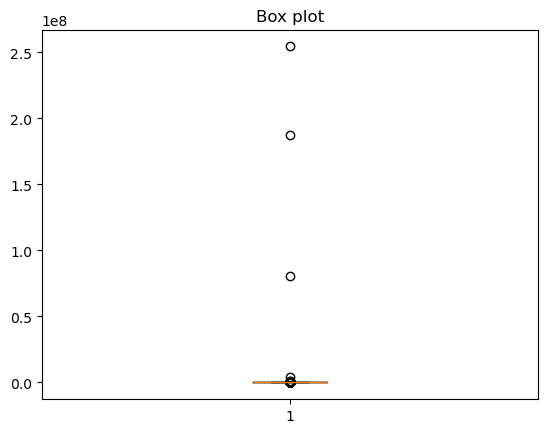

In [28]:
plt.boxplot(data['SQUARE_FT'].dropna())
plt.title('Box plot')
plt.show()

# Local outlier factor

In [29]:
from  sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=20,contamination=0.1)
data['lof']=lof.fit_predict(data[['SQUARE_FT']])
outliers_lof=data[data['lof']==-1]
print(outliers_lof)
                                

      POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
7         Owner                   0     1        3       BHK  1181.012946   
9         Owner                   0     1        2       BHK   879.120879   
14        Owner                   0     0        1       BHK   649.983750   
20        Owner                   0     0        2       BHK   881.143529   
27       Dealer                   0     0        2       BHK  1180.412371   
...         ...                 ...   ...      ...       ...          ...   
29403     Owner                   0     0        2       BHK   840.336135   
29410    Dealer                   1     0        1       BHK   650.022160   
29413     Owner                   0     0        2       BHK   639.874270   
29420     Owner                   0     0        3       BHK  1274.755293   
29447     Owner                   0     0        2       BHK   769.230769   

       READY_TO_MOVE  RESALE                            ADDRESS  LONGITUDE 

# Treating Outlier

In [30]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),zscore,lof
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,-0.133812,1
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,-0.139902,1
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,-0.152080,1
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,-0.122395,1
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,-0.125439,1


In [33]:
Q1 = data['SQUARE_FT'].quantile(0.25)
Q3 = data['SQUARE_FT'].quantile(0.75)
IQR = Q3 - Q1

median_value=data['SQUARE_FT'].median()
import numpy as np
median=data['SQUARE_FT'].median()
data['SQUARE_FT1']=np.where((data['SQUARE_FT']<(Q1-1.5*IQR))|(data['SQUARE_FT']>(Q3+1.5*IQR)),median,data['SQUARE_FT'])
data.tail(20)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),zscore,lof,SQUARE_FT1
29431,Owner,0,0,2,BHK,712.105799,1,1,"Rajarhat,Kolkata",22.541110,88.337780,21.0,-0.185572,1,712.105799
29432,Owner,0,0,4,BHK,1212.121212,1,1,"west mambalam,Chennai",13.038900,80.225800,110.0,-0.050083,1,1212.121212
29433,Owner,0,0,2,BHK,1195.028681,1,1,"Hulimavu,Bangalore",12.876691,77.599080,50.0,-0.141424,1,1195.028681
29434,Owner,0,0,3,BHK,1700.404858,1,1,"Sanganer,Jaipur",26.773189,75.611910,63.0,-0.121634,1,1700.404858
29435,Dealer,0,1,4,BHK,2189.160468,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,82.4,-0.092100,1,2189.160468
29436,Owner,1,1,2,BHK,1175.132676,0,1,"Whitefield,Bangalore",12.995893,77.761394,62.0,-0.123156,1,1175.132676
29437,Dealer,0,0,2,BHK,760.116253,1,1,"Nandi Bagan,Kolkata",22.541110,88.337780,34.0,-0.165782,1,760.116253
29438,Builder,1,1,3,BHK,1560.000000,0,0,"Van Vrindavan Colony,Ranchi",19.075483,82.029995,54.6,-0.134421,1,1560.000000
29439,Dealer,1,1,2,BHK,975.609756,0,1,"Laxmi Nagar,Lalitpur",22.281215,70.789479,120.0,-0.034860,1,975.609756
29440,Builder,0,1,3,BHK,1652.634861,1,0,"Gandhi Nagar,Gulbarga",17.357159,76.841908,53.0,-0.136857,1,1652.634861


In [36]:
data_cleaned=data[~((data['SQUARE_FT']< (Q1-1.5*IQR))|(data['SQUARE_FT']>(Q3+1.5*IQR)))]
data_cleaned

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),zscore,lof,SQUARE_FT1
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,-0.133812,1,1300.236407
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,-0.139902,1,1275.000000
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,-0.152080,1,933.159722
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,-0.122395,1,929.921143
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,-0.125439,1,999.009247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,-0.149036,1,2500.000000
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,-0.193184,-1,769.230769
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,-0.176286,1,1022.641509
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,-0.115544,1,927.079009


In [37]:
data.corr(numeric_only=True)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),zscore,lof,SQUARE_FT1
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399,0.055399,-0.049113,-0.107880
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636,0.067636,-0.029345,0.007588
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283,0.112283,0.047672,0.637153
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685,0.402685,-0.028282,-0.000114
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399,-0.055399,0.049113,0.107880
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378,-0.207378,0.040967,0.115820
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112,-0.031112,0.019720,0.081305
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254,-0.017254,0.017659,0.024905
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000,1.000000,0.002758,0.049777
zscore,0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000,1.000000,0.002758,0.049777


# seprate numeric and object(string) variables

In [41]:
categorical_columns=['POSTED_BY','BHK_OR_RK','ADDRESS']

In [42]:
numeric_columns=['UNDER_CONSTRUCTION','RERA','BHK_NO.','SQUARE_FT','RESALE','READY_TO_MOVE','LONGITUDE','LATITUDE']

# preprocessing for numeric data

In [43]:
numerical_transformer=StandardScaler()

# preprocessing for categorical values

In [44]:
categorical_transformer=OneHotEncoder(handle_unknown='ignore')

Bundle preprocessing for numeric and categorical data


In [45]:
preprocessor=ColumnTransformer(
transformers=[
    ('num',numerical_transformer,numeric_columns),
    ('cat',categorical_transformer,categorical_columns)
])

# Apply transformation to features

In [46]:
x_preprocessed=preprocessor.fit_transform(x)

In [47]:
x_preprocessed

<29451x6912 sparse matrix of type '<class 'numpy.float64'>'
	with 323961 stored elements in Compressed Sparse Row format>

# Split the data into train and test

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_preprocessed,y,test_size=0.2,random_state=20)

# Train Ridge Regression Model

In [49]:
ridge_reg=Ridge(random_state=42)

In [50]:
ridge_reg.fit(x_train,y_train)

Ridge(random_state=42)

# Making predictions with Ridge Regression

In [51]:
y_pred_train=ridge_reg.predict(x_train)

In [52]:
y_pred_test=ridge_reg.predict(x_test)

# evaluating the model

In [53]:
def evaluate_model(y_true,y_pred):
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    rmse=mean_squared_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)
    return mae,mse,rmse,r2


In [54]:
train_evaluation=evaluate_model(y_train,y_pred_train)
test_evaluation=evaluate_model(y_test,y_pred_test)

# Displaying evaluation result

In [55]:
evaluation_result=pd.DataFrame({
    'Metric':['MAE','MSE','RMSE','R2'],
    'Train':train_evaluation,
    'Test':test_evaluation
})


In [56]:
print(evaluation_result)

  Metric          Train           Test
0    MAE     120.286624     148.455282
1    MSE  262566.351267  394987.282854
2   RMSE  262566.351267  394987.282854
3     R2       0.359254       0.237713


In [57]:
data.shape

(29451, 15)

In [58]:
data.size

441765

# Finding missing values for different approaches

In [59]:
missing_values=data.isnull().sum()
missing_values

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
zscore                   0
lof                      0
SQUARE_FT1               0
dtype: int64

# second approach for missing values

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
 12  zscore                 29451 non-null  float64
 13  lof                    29451 non-null  int32  
 14  SQUARE_FT1             29451 non-null  float64
dtypes:

# third approach for missing values

In [61]:
total_missing_values=data.isnull().sum().sum()

In [62]:
total_missing_values

0

# using heatmap and seaborn

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

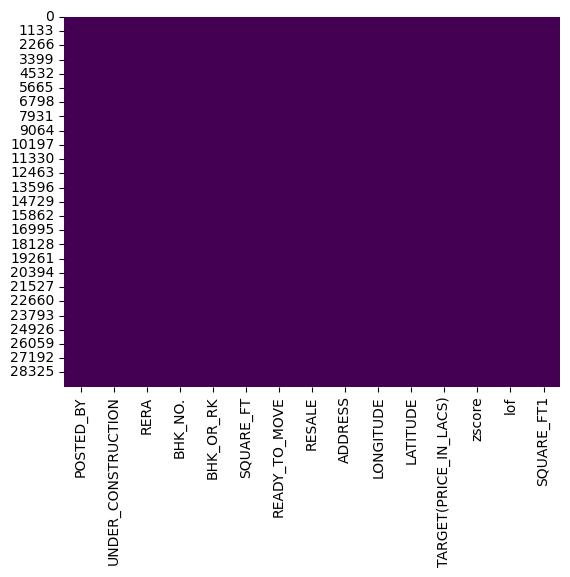

In [64]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
plt.show()

# using missingno library



<Axes: >

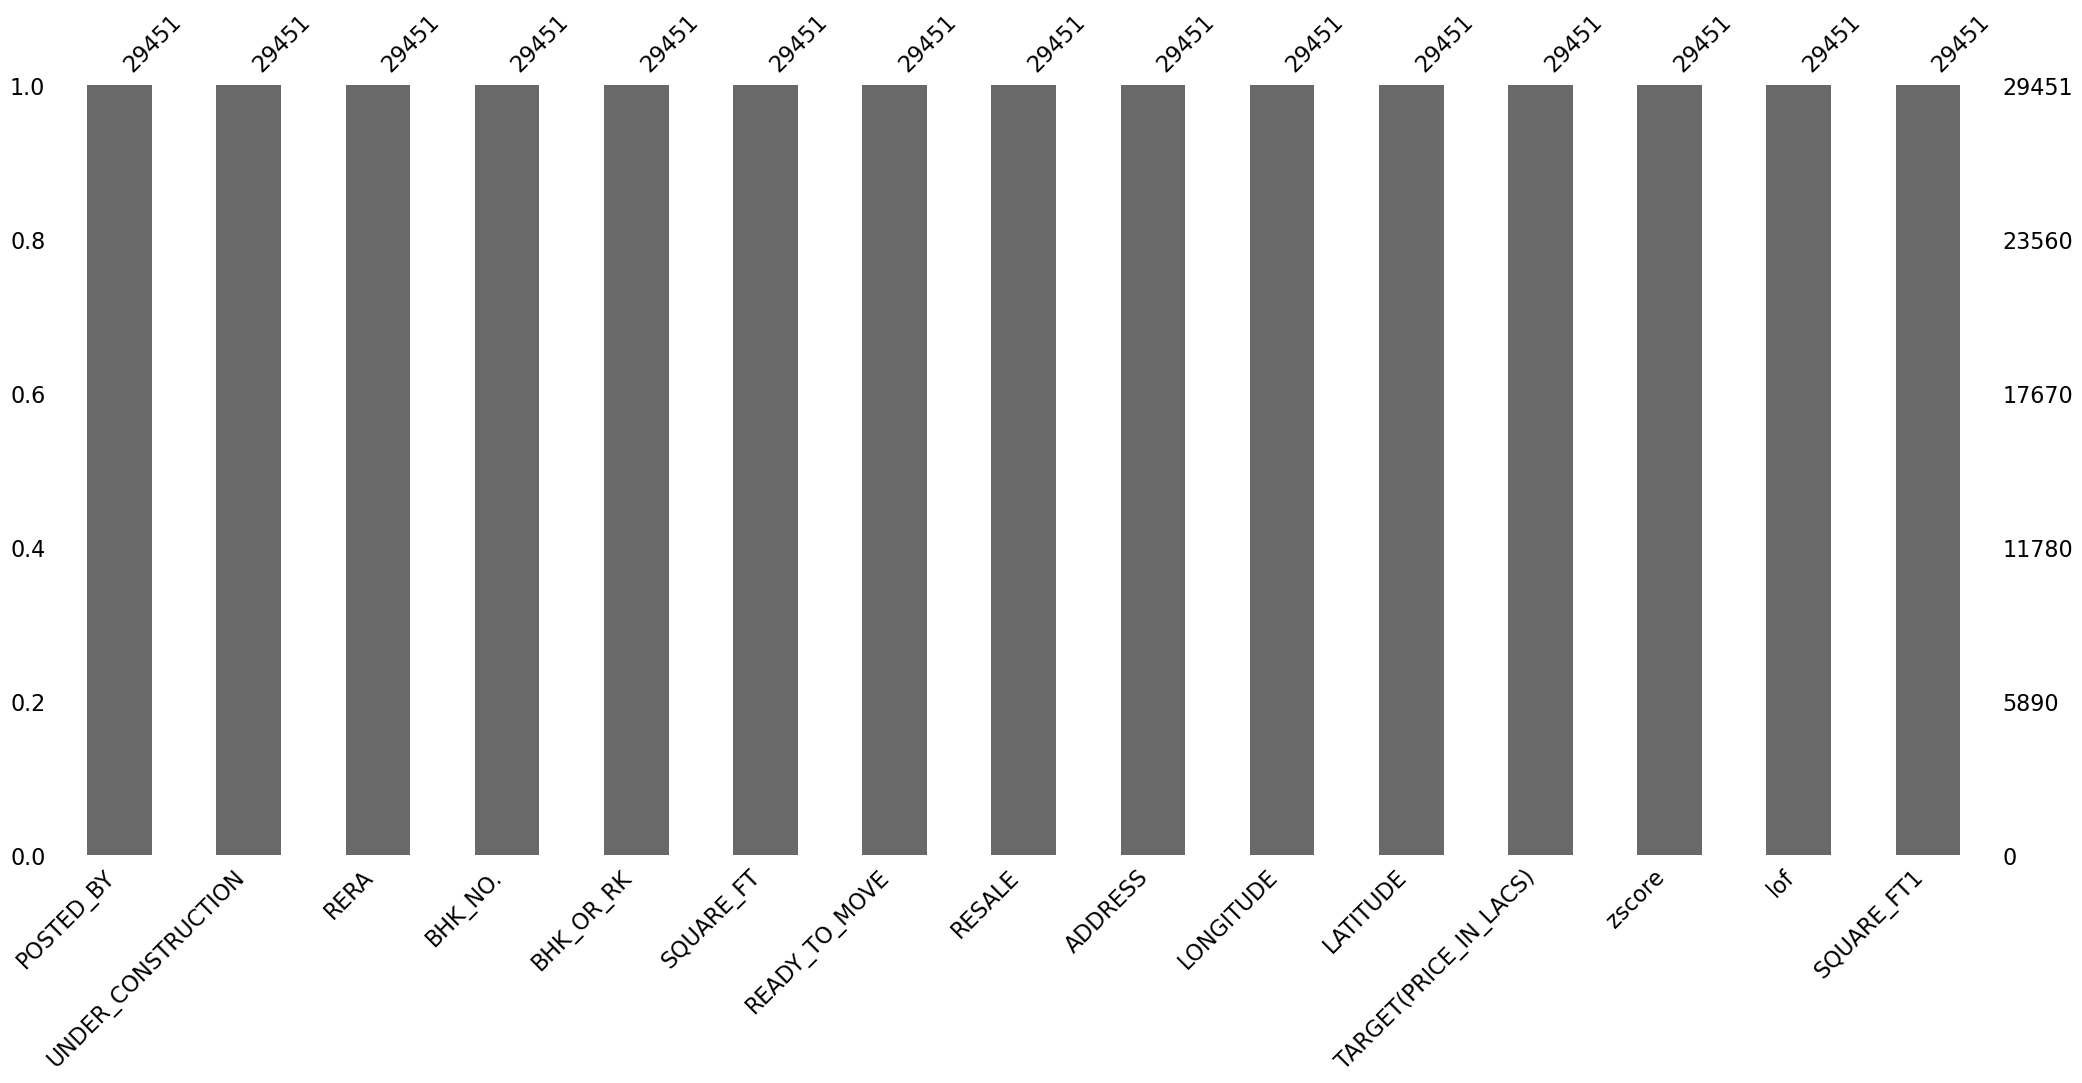

In [66]:
import missingno as msno
msno.bar(data)

<Axes: >

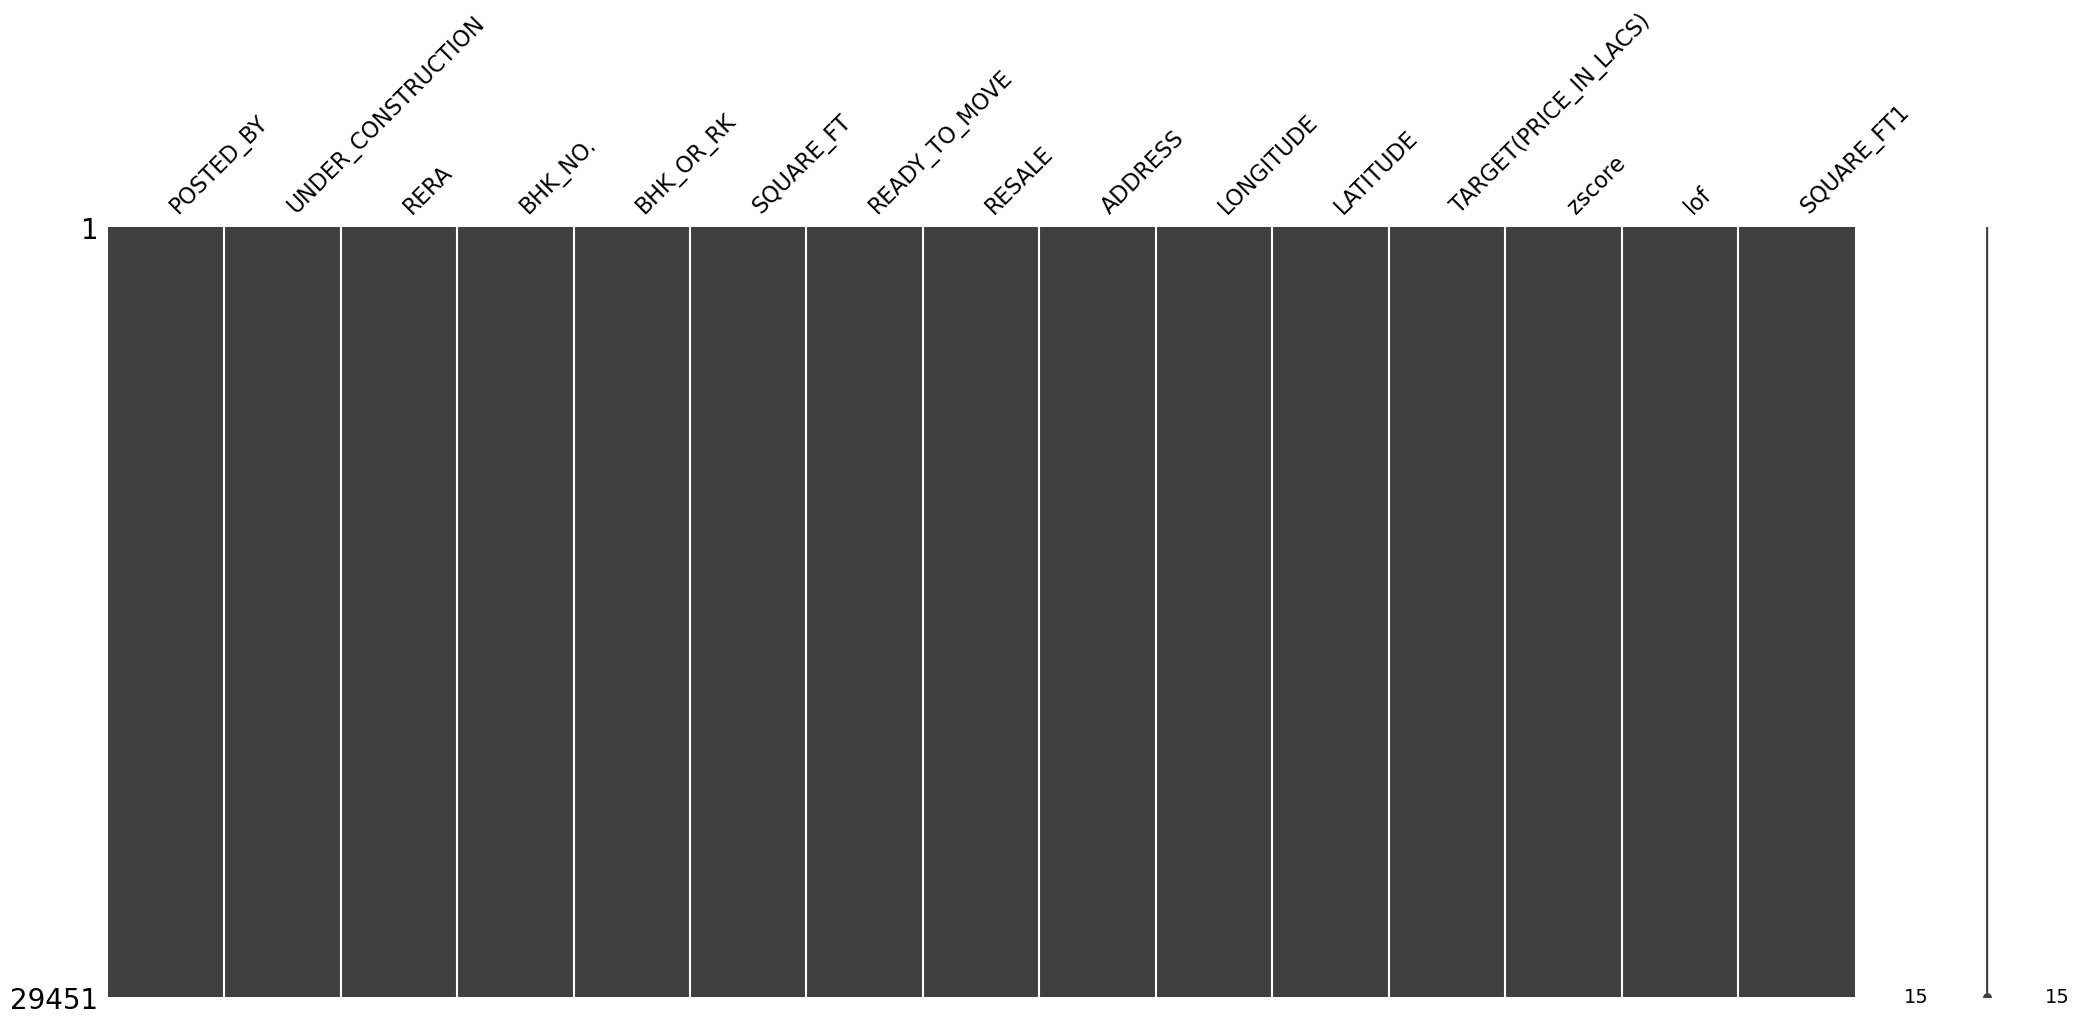

In [67]:
msno.matrix(data)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

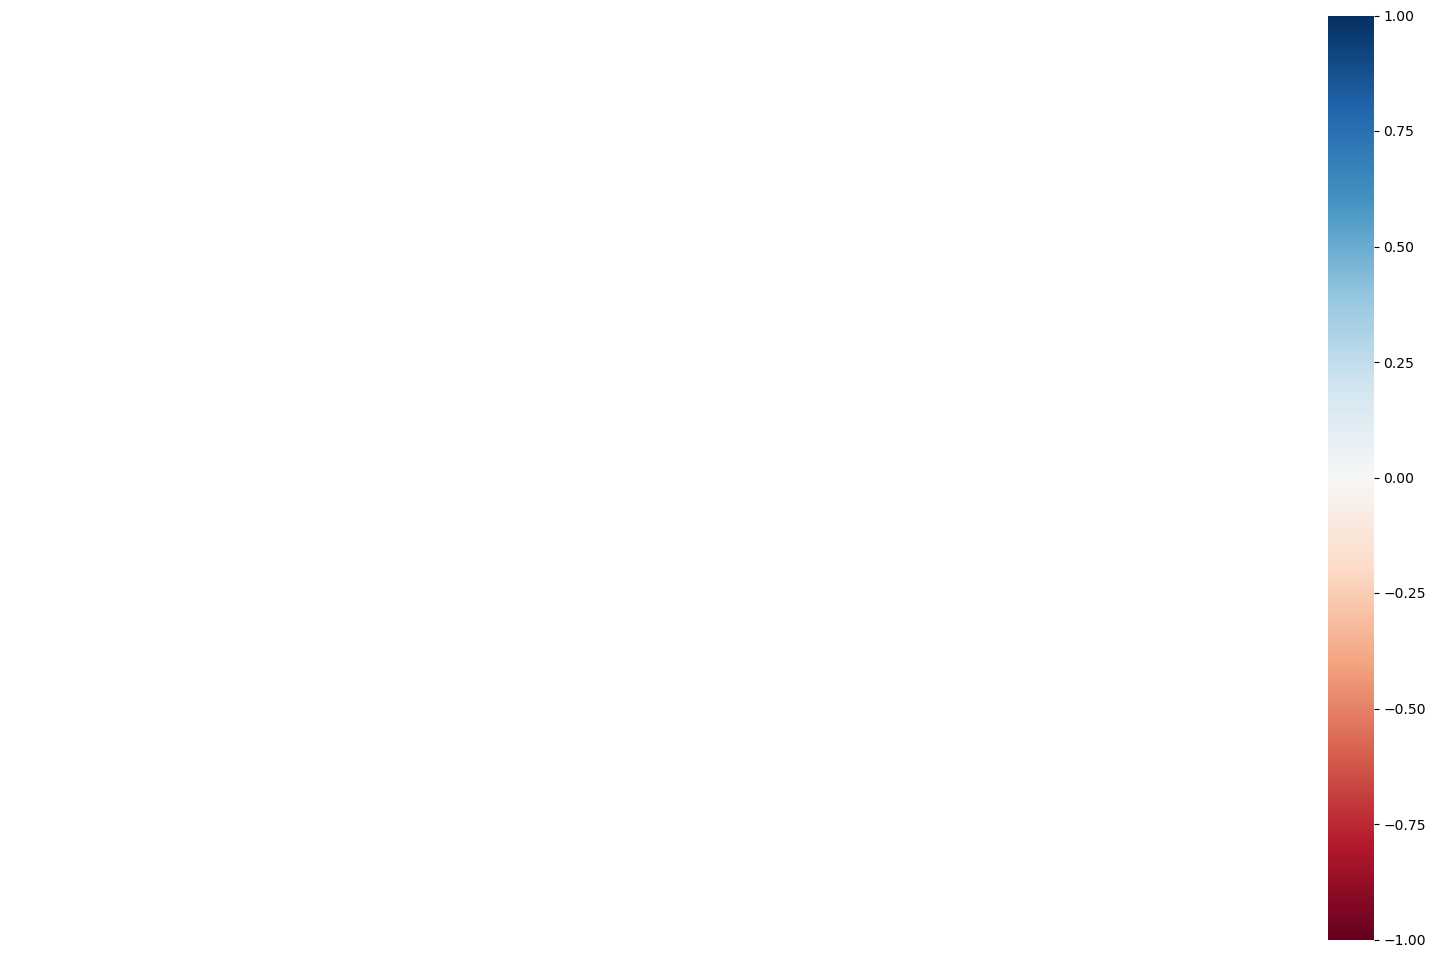

In [68]:
msno.heatmap(data)


# using describe function for nan count 

In [69]:
data.describe(include='all')

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),zscore,lof,SQUARE_FT1
count,29451,29451.000000,29451.000000,29451.000000,29451,2.945100e+04,29451.000000,29451.000000,29451,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000
unique,3,NaN,NaN,NaN,2,NaN,NaN,NaN,6899,NaN,NaN,NaN,NaN,NaN,NaN
top,Dealer,NaN,NaN,NaN,BHK,NaN,NaN,NaN,"Zirakpur,Chandigarh",NaN,NaN,NaN,NaN,NaN,NaN
freq,18291,NaN,NaN,NaN,29427,NaN,NaN,NaN,509,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.179756,0.317918,2.392279,NaN,1.980217e+04,0.820244,0.929578,NaN,21.300255,76.837695,142.898746,-5.862683e-17,0.800007,1190.508062
std,NaN,0.383991,0.465675,0.879091,NaN,1.901335e+06,0.383991,0.255861,NaN,6.205306,10.557747,656.880713,1.000000e+00,0.600001,438.742039
min,NaN,0.000000,0.000000,1.000000,NaN,3.000000e+00,0.000000,0.000000,NaN,-37.713008,-121.761248,0.250000,-2.171608e-01,-1.000000,3.000000
25%,NaN,0.000000,0.000000,2.000000,NaN,9.000211e+02,1.000000,1.000000,NaN,18.452663,73.798100,38.000000,-1.596922e-01,1.000000,900.021130
50%,NaN,0.000000,0.000000,2.000000,NaN,1.175057e+03,1.000000,1.000000,NaN,20.750000,77.324137,62.000000,-1.231559e-01,1.000000,1175.056750
75%,NaN,0.000000,1.000000,3.000000,NaN,1.550688e+03,1.000000,1.000000,NaN,26.900926,77.828740,100.000000,-6.530675e-02,1.000000,1440.144014


# using value_counts

In [71]:
for column in data.columns:
    print(data[column].value_counts(dropna=False))

POSTED_BY
Dealer     18291
Owner      10538
Builder      622
Name: count, dtype: int64
UNDER_CONSTRUCTION
0    24157
1     5294
Name: count, dtype: int64
RERA
0    20088
1     9363
Name: count, dtype: int64
BHK_NO.
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64
BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64
SQUARE_FT
1000.000000    479
1250.000000    294
800.000000     202
1200.000000    179
1600.000000    125
              ... 
1685.097420      1
1085.176085      1
1300.142248      1
911.002102       1
896.774194       1
Name: count, Length: 19561, dtype: int64
READY_TO_MOVE
1    24157
0     5294
Name: count, dtype: int64
RESALE
1    27377
0     2074
Name: count, dtype: int64
ADDRESS
Zirakpur,Chandigarh                   509
Whitefield,Bangalore                  230
Raj Nagar Extension,Ghaziabad       